# Numpy example: Reading in and analyzing topography/bathymetry data

In [2]:
import os  # this package allows us to use terminal window commands from within python
import numpy as np

## Read in file

We have a dataset saved in the repository: `cascadia.npz`. This contains topography and bathymetry data from Washington state.

In [3]:
d = np.load('../data/cascadia.npz')  # data was saved in compressed numpy format

What is contained in this file?

In [4]:
d.keys()  # notice that d is a dictionary!

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fccf9551fd0>)

In [5]:
d['z'].shape  # this is an array instead of a list, so it can have more than 1 dimension

(148, 217)

## Investigate

Let's start with a quick look at the data. We'll keep it simple since we aren't to the plotting section yet.

Text(0.5,1,'Topography and bathymetry [m]')

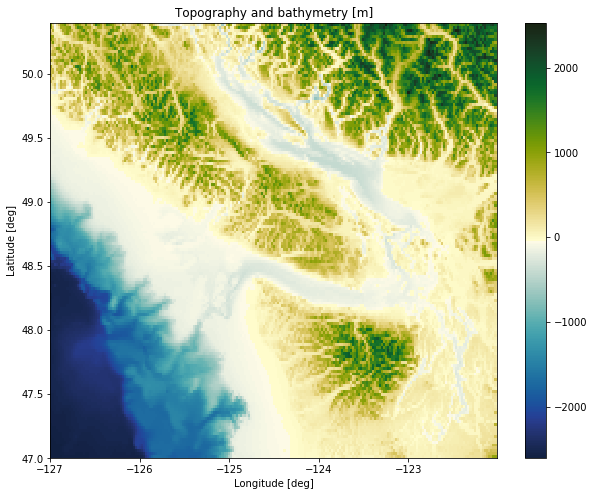

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import cmocean.cm as cmo

plt.figure(figsize=(10, 8))
plt.pcolormesh(d['lon'], d['lat'], d['z'], cmap=cmo.delta)
plt.colorbar()
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.title('Topography and bathymetry [m]')

Anyone recognize this?

Let's do a few calculations using `numpy`.

How about a mean:

In [7]:
z = d['z']  # we can rename the vertical data information to save a little space
z.mean()

-5.217627660280713

So overall we have a mean value of about -5 meters. But how meaningful is this? Let's break it down further.

We have both positive and negative values, and they represent pretty distinct areas: above and below water. It is logical that we separate the two.

In [ ]:
iabove = z > 0  # indices of the z values that are above water
ibelow = z < 0  # indices of z values that are below water

In [ ]:
print('above water: ', z[iabove])
print('below water: ', z[ibelow])

Look good! Now let's do something with them.

First, how about the mean vertical level, separate for above and below water.

In [ ]:
z[iabove].mean()

In [ ]:
z[ibelow].mean()

So, the average topographic height in this region of western Washington and Canada is about 550 meters above sea level, and the average depth is about 700 meters.

---
### *Exercise*

> Find the highest and lowest points in the dataset. 

> How does the mean value of the data between 800 and 1000 meters compare with that between -1000 and -800 meters?

---